<a href="https://colab.research.google.com/github/tdeepak509/duplicate_CQA_detection/blob/main/Internship_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.&nbsp;Introduction
<p align='justify'>
As the usage of community-based question-answering (CQA) websites increase, the volume of questions being asked and answered also grows significantly. These platforms provide a solution for users to seek answers to their inquiries, and different types of CQA websites exist for various topics, like Quora and answers.com for general queries on various subjects, and Stack Overflow, Ask Ubuntu for programming and technology related questions.
<p align='justify'>
It is crucial for CQA websites to ensure that the most relevant and accurate answers are presented to users. However, this task becomes challenging as different users tend to ask similar questions in different ways, resulting in a large number of duplicate questions. Identifying these duplicates is a difficult problem, as it is traditionally done manually by users with high reputation or high upvotes, which is both time-consuming and not always efficient.
<p align='justify'>
Previously researchers have attempted to use supervised learning techniques to automatically detect duplicate questions in CQA websites. However, these approaches have been hindered by their reliance on manually-crafted features, which can make it challenging to differentiate between duplicate and related questions.
<p align='justify'>
In this research, we aim to propose a methodology for extracting "deep" features by applying advance Feature Engineering and experiment and explore on applied different machine learning models using the Quora and Stack Exchange paraphrase corpus to determine if a pair of question is duplicate or not. To tackle this problem, we experiment with several machine learning classification models with characters level and word level frequency on two separate corpuses, and to also propose deep neural networks of multiple layers and embeddings like Word2Vec and Glove embedding, with an emphasis on how well the systems identify duplicate and non-duplicate sentences.

## 1.1&nbsp;Motivation
<p align='justify'>
The need for a duplicate question detection model is driven by the large volume of traffic on sites dedicated to asking and answering questions. With millions of people visiting these sites, it is common for individuals to ask similar or similarly-worded questions. This duplication can be costly in terms of time and effort for both the questioners and the answerers. Similar-intent questions can make it harder for questioners to find the best answer to their question, and may also compel answerers to respond to multiple versions of the same question. As the volume of duplicate questions is a significant issue that hinders the usability of these question-and-answer (Q&A) websites, a question detection model could be used to mitigate this problem.
<p align='justify'>
Also, by identifying and merging the duplicate questions on these CQA websites, it makes knowledge exchange more effective and efficient in many ways. By the adoption of this technique the writers wouldn’t have to post the same response multiple times for the same subject, and the seekers can find solutions to all of their questions on a single thread as a result. By implementing this technique, the CQA websites can attract more number of readers because the questions would be divided into several threads, thus proving the usefulness of having a duplicate question detection model.


## 1.2&nbsp;Aims and Objectives 
*  **Aim**:
The aim of this work is to identify and detect duplicate question pairs present on the Community-based question-answering (CQA) websites using Machine and Deep Learning techniques. And to evaluate the effectiveness and accuracy of our models, we would compare them to a few baseline models that have already been implemented, making it simpler for the users to find all high-quality answers.


---



---


*    **Objectives**:

1. Evaluate the performance of additional deep learning models, such as Convolutional Neural Networks (CNNs) and Transformer models like BERT and RoBERTa, for detecting duplicate question pairs on CQA websites.

2. Explore the impact of hyperparameter for tuning on the performance of existing (LSTM) and new deep learning models, including number of layers, the learning rate, and the batch size.

3. Compare the performance of the deep learning models to traditional machine learning models, such as random forest and SVM, to determine the most effective approach for detecting duplicate question pairs on CQA websites.

4. Use transfer learning to leverage pre-trained language models and improve the accuracy of the deep learning models in detecting duplicate question pairs. For Eg. Fine-tuning BERT for question pair similarity, Transfer learning with RoBERTa

5. Utilize a large chunk of dataset for training and testing the models to improve the accuracy and generalization of the models.

6. Explore advanced feature engineering techniques, such as semantic analysis, topic modeling, and Named Entity Recognition (NER), to improve the accuracy of the models in detecting duplicate question pairs on CQA websites.

# 2.&nbsp;The Dataset
<p align='justify'>
For this research, two separate datasets will be utilised. The first dataset will be fetched from Quora (general domain CQA website), and the second dataset will be retrieved from Stack Overflow (a technical domain CQA website). Both datasets have at least three columns, the first two of which are for the original and duplicate questions, and the third column is the target label, which indicates whether or not the question pair is duplicate.

## 2.1. &nbsp;Dataset 1 – Quora
<p align='justify'>
The dataset for the CQA website Quora is fetched from the Initial Quora Dataset release which is hosted on Amazon S3 (Anon, n.d.). The dataset is present as a .tsv file consisting of 404,290 no of rows, 6 data fields, and the overall size of this file is 54.8 MB. Each line in the dataset consists of potential duplicate question pair. 

## 2.2. &nbsp;Dataset 2 – StackOverflow
<p align='justify'>
The dataset of Stack Overflow is fetched by executing a Big Data Query against the Stack Exchange Data Explorer (SEDE) (Data Stack Exchange, n.d.) which in turn fetches data from Stack Exchange’s data dump repository. This data repository is provided by Creative Commons Data Dump Service. The SEDE is Stack Exchange's official file browser, from where the users can run queries to access the data. The questions, answers, changes, reviews, users, badges, tags, and other information that you see on Stack Exchange are all kept in a relational database. And in the Stack Exchange’s data repository, stack overflow alone has 23M questions, which is a lot of information. 

<p align='justify'>
By executing a big data queries that were specifically created to get the duplicate and non-duplicate questions present in the stack overflow data repository. There are 2 tables named Posts and PostHistory in the database, and in order to retrieve the duplicate and non-duplicate questions a join operation is performed between these 2 tables. All the posts on stackoverflow that were closed because of duplication are all included in the PostHistory table. We fetch all these questions that were marked as duplicates along with the original question that was used as reference to mark it as duplicate. The query fetches around 50,000 rows that is saved as .csv file and is sized around 102.6 MB. Another query fetches non-duplicate questions of around 50,000 rows which is also saved as .csv filed and size around 100.7 MB. Each row present in the dataset consists of title, body and tags for both the original and duplicate question.

# 3.&nbsp;Importing Python libraries and loading the dataset

In [1]:
import nltk
!pip install contractions
!pip install distance
!pip install fuzzywuzzy
!pip install modin
!pip install tqdm
!pip install vaex
!pip install dask
!pip install dask_ml

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=af54be073674e92dce6c3a32952293cee17b009adc210097796f8f437b720ee1
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Switching to the main directory
import os 
os.chdir('/content/drive/MyDrive/Colab Notebooks/Deepak Internship')

In [3]:
import os
import re
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import distance


from bs4 import BeautifulSoup
import contractions
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from fuzzywuzzy import fuzz
import vaex
import dask.dataframe as dd



from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
import modin.pandas as pds

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import helper_functions
from tqdm import tqdm



/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
print(os.listdir("/content/drive/MyDrive/unzipped"))

['test.csv', 'sample_submission.csv', 'train.csv', 'Stack Overflow', 'template.pkl', 'template_1.pkl', 'X_train.pkl', 'X_test.pkl', 'y_train.pkl', 'y_test.pkl', 'HDF5', 'CSV', 'stack_data.pkl', 'checkpoint6.pkl']


## 3.1.&nbsp;Loading Quora Dataset

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/unzipped/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/unzipped/test.csv")

In [ ]:
train_df.shape, test_df.shape

((404290, 6), (2345796, 3))

## 3.2.&nbsp;Loading Stack Overflow Dataset

In [ ]:
stack_data_dup = pd.read_csv('/content/drive/MyDrive/unzipped/Stack Overflow/SO_duplicate.csv')

In [ ]:
stack_data_non_dup_p1 = pd.read_csv('/content/drive/MyDrive/unzipped/Stack Overflow/SO_Part1.csv')
stack_data_non_dup_p2 = pd.read_csv('/content/drive/MyDrive/unzipped/Stack Overflow/SO_Part2.csv')


stack_data_non_dup = pd.concat([stack_data_non_dup_p1,stack_data_non_dup_p2],axis=1)

In [ ]:
stack_data = pd.concat([stack_data_non_dup, stack_data_dup]).sample(frac=1, random_state=101)

# 4.&nbsp; Data Exploration & Preprocessing - Quora

## 4.1.&nbsp;Purpose of EDA:

<p align='justify'>
The main purpose of Exploratory Data Analysis (EDA) is to gain a deep understanding of the dataset and extract meaningful insights from it. EDA is an important first step in any data analysis project because it helps to identify any missing or erroneous data that needs to be cleaned or removed. EDA also helps to identify the important features in your dataset, which can be used to build a predictive model. EDA can also help to identify patterns or trends in the data, which can lead to interesting insights or hypotheses to be tested. Finally, EDA can help to estimate the parameters and associated intervals of the data, which can be used to build a more accurate model.

## 4.2.&nbsp;Tools of EDA

<p align='justify'>
Exploratory data analysis (EDA) involves the use of various tools to gain insights from data. These tools include classification, dimensionality reduction techniques, univariate analysis, bivariate analysis, multivariate analysis, and predictive analysis. Classification and dimensionality reduction techniques can be used to group observations into categories or reduce the number of features in a dataset. Univariate analysis is used to analyze a single variable at a time to understand its distribution, while bivariate analysis is used to analyze the relationship between two variables. Multivariate analysis is used to analyze multiple variables simultaneously. Finally, predictive analysis involves building a model to make predictions based on the data. By using these tools, EDA can help identify missing or erroneous data, gain deeper insights from the dataset, identify important features, perform hypothesis testing, and estimate parameters and associated intervals.

In [ ]:
## 4.3.&nbsp;Basic Data Exploration

In [ ]:
# Display the first 5 observations of the train dataset

train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
# Display the first 5 observations of the test dataset

test_df.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [ ]:
# Display the last 5 observations of the train dataset

train_df.tail()

,id,qid1,qid2,question1,question2,is_duplicate
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [ ]:
# Display the last 5 observations of the test dataset

test_df.tail()

,test_id,question1,question2
2345791,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
2345792,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2345793,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
2345794,2345794,What were the best and worst things about publ...,What are the best and worst things examination...
2345795,2345795,What is the best medication equation erectile ...,How do I out get rid of Erectile Dysfunction?


In [ ]:
# Display the number of variables and observations

train_df.shape,test_df.shape

((404290, 6), (2345796, 3))

In [ ]:
# Display the variable names and data types

train_df.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [ ]:
# Count the number of non-missing values of each variable

train_df.count()

id              404290
qid1            404290
qid2            404290
question1       404289
question2       404288
is_duplicate    404290
dtype: int64

In [ ]:
# Descriptive statistics 

train_df.describe(include = 'all')

,id,qid1,qid2,question1,question2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404289,404288,404290.000000
unique,NaN,NaN,NaN,290456,299174,NaN
top,NaN,NaN,NaN,How do I improve my English speaking?,How can you look at someone's private Instagra...,NaN
freq,NaN,NaN,NaN,50,120,NaN
mean,202144.500000,217243.942418,220955.655337,NaN,NaN,0.369198
std,116708.614503,157751.700002,159903.182629,NaN,NaN,0.482588
min,0.000000,1.000000,2.000000,NaN,NaN,0.000000
25%,101072.250000,74437.500000,74727.000000,NaN,NaN,0.000000
50%,202144.500000,192182.000000,197052.000000,NaN,NaN,0.000000
75%,303216.750000,346573.500000,354692.500000,NaN,NaN,1.000000


In [ ]:
# Display the complete summary of the dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


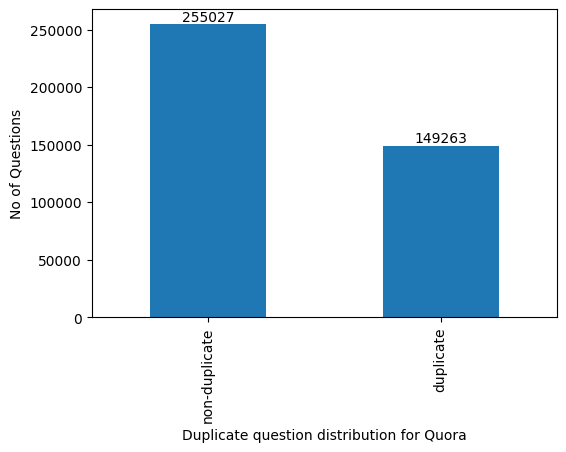

In [ ]:
ax = train_df['is_duplicate'].value_counts().plot(kind='bar',figsize=(6, 4))
x_labels = ['non-duplicate', 'duplicate']

ax.set_xlabel('Duplicate question distribution for Quora')
ax.set_ylabel('No of Questions')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xticklabels(x_labels)
plt.show()

<p align='justify'>
The purpose of above visualization is to analyse the number of unique and duplicate questions in the Quora dataset and to compare the two. From the bar chart, it is clear that there are more non-duplicate questions with 255027 no of rows present in the dataset than duplicate questions 149263. This information is useful for understanding the content and quality of the dataset, the target label distribution is uneven and needs to be balanced before processing. 

## 4.3.&nbsp; Data Cleaning

### 4.3.1.&nbsp; Finding Missing Values

In [ ]:
# Missing values present in the dataset

def get_missing_values(df):
  for col in df.columns:
    print("Column " + col + ' -- ' + str(sum(df[col].isna())))

get_missing_values(train_df)

Column id -- 0
Column qid1 -- 0
Column qid2 -- 0
Column question1 -- 1
Column question2 -- 2
Column is_duplicate -- 0


### 4.3.2.&nbsp; Handling Missing Values


Since there are barely any 3 rows that have missing values in the datset. We can just drop all the rows

In [ ]:
#Dropping the rows that have missing values

train_df = train_df.dropna()

### 4.3.3.&nbsp; Balancing the Dataset

To balance the dataset, we can either oversample the minority class (class with fewer samples) or undersample the majority class (class with more samples).

In our case, we will undersample the majority class by randomly removing samples from the majority class

In [ ]:
train_df['is_duplicate'].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

In [ ]:
# Separate the majority and minority class
df_majority = train_df[train_df['is_duplicate'] == 0]
df_minority = train_df[train_df['is_duplicate'] == 1]

# Undersample the majority class
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=101)

# Concatenate the majority undersampled class and minority class
train_df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the dataset
train_df_balanced = train_df_balanced.sample(frac=1, random_state=101)


In [ ]:
train_df_balanced['is_duplicate'].value_counts()

1    149263
0    149263
Name: is_duplicate, dtype: int64

[Text(0, 0, '149263'), Text(0, 0, '149263')]

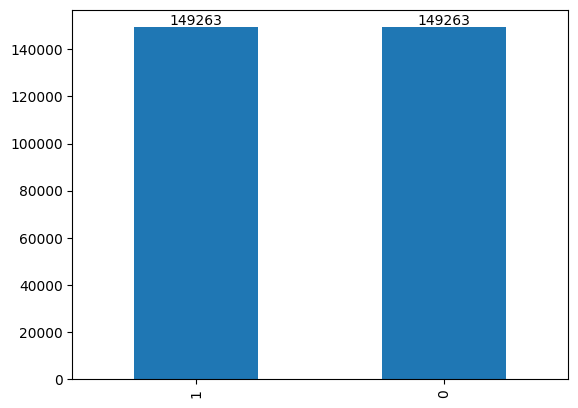

In [ ]:
ax = train_df_balanced.is_duplicate.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], label_type='edge')

## 4.4.&nbsp; Data Exploration

### 4.4.1.&nbsp; Distribution of repeated Questions

The Quora dataset contains unique question IDs for both original and duplicate questions. In this project, we will leverage these IDs to determine the frequency of each question within the dataset. By plotting a histogram, we can easily visualize the distribution of questions and their corresponding frequency counts.

In [ ]:
all_qid = pd.Series(train_df_balanced['qid1'].tolist() + train_df_balanced['qid2'].tolist())

In [ ]:
all_qid_counts = all_qid.value_counts()

repeated_qns = all_qid_counts[all_qid_counts > 1].shape[0]
non_repeated_qns = all_qid_counts[all_qid_counts == 1].shape[0]

qns = [repeated_qns, non_repeated_qns]

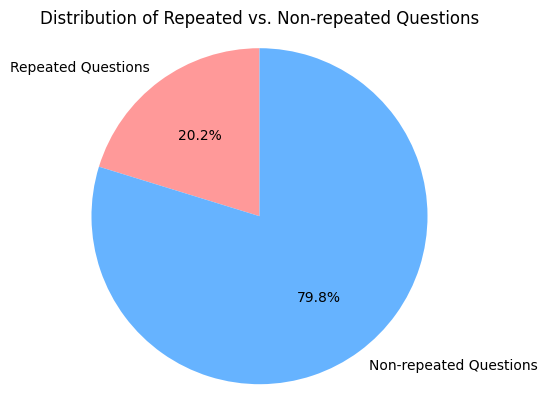

In [ ]:
labels = ['Repeated Questions', 'Non-repeated Questions']

# Define the colors for the pie chart
colors = ['#ff9999','#66b3ff']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(qns, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)

# Set the axis aspect ratio to be equal, and add a title
ax.axis('equal')
plt.title('Distribution of Repeated vs. Non-repeated Questions')

plt.show()

### 4.4.2.&nbsp; Frequency of Questions

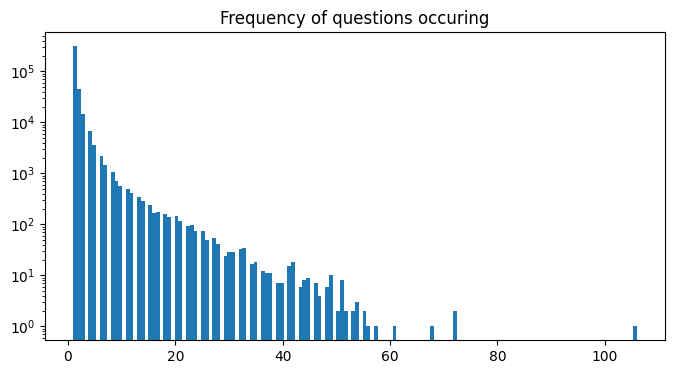

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(all_qid.value_counts().values,bins=150)
plt.yscale('log')
plt.title("Frequency of questions occuring")
plt.show()

<p align='justify'>
The histogram shown above illustrates the distribution of question frequencies in the Quora dataset. The x-axis depicts the number of occurrences of a question, while the y-axis shows the number of questions with that frequency. The histogram clearly shows that the majority of questions in the dataset occur less than 55 to 60 times. The first bar represents the number of unique questions, and the following bars represent the number of questions that appear a certain number of times. This data suggests that there is a limited number of frequently appearing questions in the dataset, with the vast majority of questions occurring less frequently.

## 4.5.&nbsp; Data Preprocessing Function for NLP Tasks

In [ ]:
def preprocess_data(q):
  q = str(q).lower().strip()
    
    # Create a dictionary of special characters and their string equivalents
  special_chars = {
      '%': 'percent',
      '$': 'dollar',
      '₹': 'rupee',
      '€': 'euro',
      '@': 'at'
  }

  # Replace special characters with their string equivalents using dictionary comprehension
  q = ''.join([special_chars.get(c, c) for c in q])

  # Replace '[math]' with empty string
  q = q.replace('[math]', '')
  
  # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
  q = q.replace(',000,000,000 ', 'b ')
  q = q.replace(',000,000 ', 'm ')
  q = q.replace(',000 ', 'k ')
  q = re.sub(r'([0-9]+)000000000', r'\1b', q)
  q = re.sub(r'([0-9]+)000000', r'\1m', q)
  q = re.sub(r'([0-9]+)000', r'\1k', q)

  # Fixing all the contractions present in the questions
  q = contractions.fix(q)

  # Removing HTML tags
  q = BeautifulSoup(q)
  q = q.get_text()

  # Lemmatize the words in the question
  lemmatizer = WordNetLemmatizer()
  q = " ".join([lemmatizer.lemmatize(word) for word in q.split()])
  
  # Remove punctuations
  pattern = re.compile('\W')
  q = re.sub(pattern, ' ', q).strip()

  return q

<p align='justify'>
This code defines a function named preprocess_data(q) that takes a string as input and preprocesses it for use in natural language processing tasks. The function first converts the input to lowercase and removes leading/trailing whitespaces. It then replaces some special characters (e.g., %, $, ₹) with their string equivalents (e.g., percent, dollar, rupee). Additionally, it replaces some numbers with string equivalents (e.g., 1,000,000 with 1m). The function also replaces contractions (e.g., "won't" with "will not") ,removes HTML tags,  lemmatizes the words, removes punctuations. Finally, the function removes all punctuation and returns the preprocessed string. This function can be used as a preprocessing step before feeding text data to machine learning models.

In [ ]:
train_df_balanced.head()

,id,qid1,qid2,question1,question2,is_duplicate
399965,399965,533287,533288,"What is the difference between Dvaita, Advaita...","What is the difference between Dvaita, Advait...",1
395784,395784,528800,528801,What is your review of Sabarmati Riverfront (A...,"Gujarat, India: Why does the BJP government cl...",0
211924,211924,20735,127447,How can porn ruins one's sex life?,Does porn destroy my sex life?,1
388317,388317,520695,520696,Is iOS development easier than Android?,Do you think learning iOS development is easie...,1
153987,153987,53338,241582,What is your review of Microsoft Surface Pro 3?,What do you think of the Surface Pro 3?,1


In [ ]:
train_df_balanced['question1'] = train_df_balanced['question1'].apply(preprocess_data)

In [ ]:
train_df_balanced['question2'] = train_df_balanced['question2'].apply(preprocess_data)

In [ ]:
train_df_balanced.head()

,id,qid1,qid2,question1,question2,is_duplicate
399965,399965,533287,533288,what is the difference between dvaita advaita...,what is the difference between dvaita advaita...,1
395784,395784,528800,528801,what is your review of sabarmati riverfront a...,gujarat india why doe the bjp government cla...,0
211924,211924,20735,127447,how can porn ruin one s sex life,doe porn destroy my sex life,1
388317,388317,520695,520696,is io development easier than android,do you think learning io development is easier...,1
153987,153987,53338,241582,what is your review of microsoft surface pro 3,what do you think of the surface pro 3,1


# 5.&nbsp; Data Exploration & Preprocessing - Stack Overflow

## 5.1.&nbsp;Basic Data Exploration

In [ ]:
# Display the first 5 observations of the dataset

stack_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
6324,4616202,Self-references in object literals / initializers,<p>Is there any way to get something like the ...,<javascript><object-literal>,4858931,reference variable in object literal?,<p>say I have</p>\n\n<pre><code>myfunc({\n va...,<javascript><object-literal>,1
2881,3242937,Ubuntu and Ruby version,<p>I have Ruby versions 1.8.7 and 1.9.1 on Ubu...,<ruby><ubuntu>,3243088,Installing RVM (Ruby Version Manager),<p>Can someone please translate this into mana...,<ruby>,1
10647,4945177,Printing from a Windows Service,<p>How can I printing a document on a specific...,<c#><printing><windows-services>,7990,Printing from a .NET Service,<p>I am working on a project right now that in...,<c#><.net><windows-services><printing>,1
42046,2656606,Can a file be opened simultaneously under SIlv...,<p>Silverlight uses an IsolatedStorageFileStre...,<c#><silverlight>,7800144,issue reading in data,<p>I am having trouble reading data from a fil...,<c++><fstream>,0
9912,2533249,Nested foreach in PHP produces different resul...,<p>I'm having problems to iterate twice on the...,<php><foreach>,7691790,Renaming project directory in VS 2010,<p>What would be a sequence of operations to r...,<visual-studio-2010>,0


In [ ]:
# Display the last 5 observations of the dataset

stack_data.tail()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
5695,2516652,scoping error in recursive closure,<p>why does this work:</p>\n\n<pre><code>def f...,<python><recursion><scope><closures>,7677675,UIImageView Delay or revert to different frame,<p>Ok so I have been searching and have been u...,<iphone><ios><ios4>,0
23542,18063710,How to get the list of arguments in a Jinja2 t...,<p>How do I get a list of all the arguments pa...,<python><templates><flask><jinja2>,3398850,How to get a list of current variables from Ji...,<p>If I return a Jinja2 template like so:\n<co...,<templates><jinja2>,1
33281,18515471,Can I execute multiple queries separated by se...,<p>My jdbc driver for mysql db is of version 5...,<java><mysql><jdbc>,10797794,Multiple queries executed in java in single st...,<p>Hi I was wondering if it is possible to exe...,<java><mysql><sql><jdbc>,1
33467,18521672,"why is a comma used before ""contents""",<p>I saw the following snippet in a jquery cod...,<javascript><jquery>,3781406,JavaScript variable definition: Commas vs. Sem...,"<p>What are the differences and/or advantages,...",<javascript><variables>,1
45919,2671503,How to stop debugging (or detach process) with...,<p>I often use VS 2008 to debug a .NET C# comp...,<visual-studio><visual-studio-2008><debugging>,7813130,Segmentation fault with queue algorithm,<p>I made a small queue as shown below which i...,<c><queue>,0


In [ ]:
# Display the number of variables and observations

stack_data.shape

(100000, 9)

In [ ]:
# Display the variable names and data types

stack_data.dtypes

OId             int64
OTitle         object
OBody          object
OTags          object
DId             int64
DTitle         object
DBody          object
DTags          object
isDuplicate     int64
dtype: object

In [ ]:
# Count the number of non-missing values of each variable

stack_data.count()

OId            100000
OTitle         100000
OBody          100000
OTags          100000
DId            100000
DTitle         100000
DBody          100000
DTags          100000
isDuplicate    100000
dtype: int64

In [ ]:
# Descriptive statistics 

stack_data.describe(include = 'all')

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
count,1.000000e+05,100000,100000,100000,1.000000e+05,100000,100000,100000,100000.000000
unique,NaN,99386,99433,61638,NaN,83153,83166,57322,NaN
top,NaN,CREATE TABLE IF NOT EXISTS equivalent in SQL S...,<p><code>CREATE TABLE IF NOT EXISTS</code> wor...,<javascript>,NaN,How do I compare strings in Java?,<p>I've been using the <code>==</code> operato...,<android>,NaN
freq,NaN,15,15,1154,NaN,289,289,823,NaN
mean,8.692333e+06,NaN,NaN,NaN,7.868059e+06,NaN,NaN,NaN,0.500000
std,7.746550e+06,NaN,NaN,NaN,6.207490e+06,NaN,NaN,NaN,0.500003
min,1.300000e+01,NaN,NaN,NaN,4.000000e+00,NaN,NaN,NaN,0.000000
25%,2.579925e+06,NaN,NaN,NaN,4.969336e+06,NaN,NaN,NaN,0.000000
50%,2.674710e+06,NaN,NaN,NaN,7.722742e+06,NaN,NaN,NaN,0.500000
75%,1.750376e+07,NaN,NaN,NaN,7.806316e+06,NaN,NaN,NaN,1.000000


In [ ]:
# Display the complete summary of the dataset

stack_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 6324 to 45919
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   OId          100000 non-null  int64 
 1   OTitle       100000 non-null  object
 2   OBody        100000 non-null  object
 3   OTags        100000 non-null  object
 4   DId          100000 non-null  int64 
 5   DTitle       100000 non-null  object
 6   DBody        100000 non-null  object
 7   DTags        100000 non-null  object
 8   isDuplicate  100000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 7.6+ MB


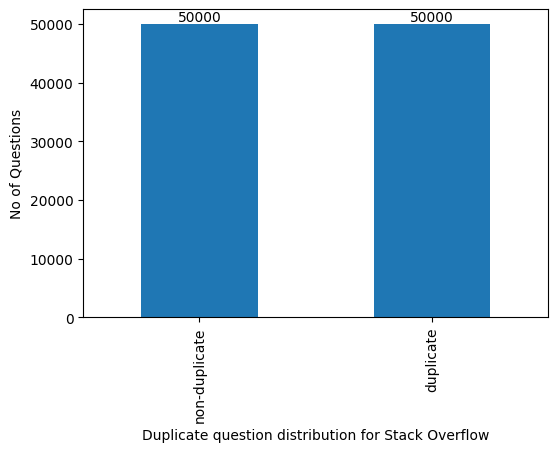

In [ ]:
ax = stack_data['isDuplicate'].value_counts().plot(kind='bar',figsize=(6, 4))
x_labels = ['non-duplicate', 'duplicate']

ax.set_xlabel('Duplicate question distribution for Stack Overflow')
ax.set_ylabel('No of Questions')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xticklabels(x_labels)
plt.show()

<p align='justify'>
The purpose of above visualization is to analyse the number of unique and duplicate questions in the Stack Overflow dataset and to compare the two. From the bar chart, it is clear that the stackoverflow dataset has a balanced target with 50,000 records belonging to the duplicate questions and another 50,000 records belonging to the non-duplicate questions. This information is useful for understanding the content and quality of the dataset, the target label distribution is even and doesn't require to be balanced before processing. 

## 5.2.&nbsp; Data Cleaning

### 5.2.1.&nbsp; Finding Missing Values

In [ ]:
# Missing values present in the dataset

helper_functions.get_missing_values(stack_data)

Column OId -- 0
Column OTitle -- 0
Column OBody -- 0
Column OTags -- 0
Column DId -- 0
Column DTitle -- 0
Column DBody -- 0
Column DTags -- 0
Column isDuplicate -- 0


## 5.3.&nbsp; Data Preprocessing Function

In [ ]:
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup

In [ ]:
nltk.download('stopwords')

nltk.download('averaged_perceptron_tagger')

nltk.download('wordnet')

nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### 5.3.1.&nbsp; Cleaning the Body text

In [ ]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


def pre_process(text):
    # Define regex patterns
    regex_patterns = [
        r'<[^>]+>',  # HTML tags
        r'@(\w+)',  # @-mentions
        r"#(\w+)",  # hashtags
        r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-f][0-9a-f]))+',  # URLs
        r'[^0-9a-z #+_\r\n\t]',  # BAD SYMBOLS
    ]

    # Define replacements for each regex pattern
    replacements = [
        ' ',  # HTML tags
        '',  # @-mentions
        '',  # hashtags
        '',  # URLs
        ' ',  # BAD SYMBOLS
    ]

    # Define stopwords and lemmatizer
    STOP_WORDS = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Function to get part of speech for lemmatization
    def get_pos_tag(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            # As default pos in lemmatization is Noun
            return wordnet.NOUN

    # Define regex patterns and replacements for URL, hash and at mentions
    REPLACE_URLS = re.compile(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-f][0-9a-f]))+')
    REPLACE_HASH = re.compile(r'#(\w+)')
    REPLACE_AT = re.compile(r'@(\w+)')
    REPLACE_BY = re.compile(r"[^a-z0-9\-]")

    # Replace URLs, hash and at mentions
    text = REPLACE_URLS.sub('', text)
    text = REPLACE_HASH.sub('', text)
    text = REPLACE_AT.sub('', text)
    text = REPLACE_BY.sub(' ', text)

    # Replace HTML tags using BeautifulSoup
    soup = BeautifulSoup(text)
    for code_tag in soup.find_all('code'):
        code_tag.replace_with('CODE')
    text = soup.get_text().replace('\n', ' ')

    # Remove whitespace and hyphens from the text
    text = ' '.join(text.replace("-","").split())

    # Remove all regex patterns and replace them with spaces
    for i in range(len(regex_patterns)):
        text = re.sub(regex_patterns[i], replacements[i], text)

    # Tokenize text and lemmatize each token
    tokens = nltk.word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(word.strip(), get_pos_tag(tag))
                         for word, tag in nltk.pos_tag(tokens)
                         if word not in STOP_WORDS and len(word) > 3]


    # Join the lemmatized tokens and return the pre-processed text
    return ' '.join(lemmatized_tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
## Applying the function to all the questions present in the original and duplicate body column in order to check well the cleaning processed 

stack_data['OBody'] = stack_data['OBody'].apply(pre_process)
stack_data['DBody'] = stack_data['DBody'].apply(pre_process)


In [ ]:
## Check Point 4
stack_data.to_pickle('/content/drive/MyDrive/unzipped/stack_data.pkl')

In [ ]:
stack_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
6324,4616202,Self-references in object literals / initializers,something like follow work cript code oesn wor...,<javascript><object-literal>,4858931,reference variable in object literal?,code myfunc var1 var2 code want value make cur...,<javascript><object-literal>,1
2881,3242937,Ubuntu and Ruby version,version buntu system register use code ruby co...,<ruby><ubuntu>,3243088,Installing RVM (Ruby Version Manager),someone please translate manageable step need ...,<ruby>,1
10647,4945177,Printing from a Windows Service,print document specific printer indows ervice ...,<c#><printing><windows-services>,7990,Printing from a .NET Service,work project right involve receive message ano...,<c#><.net><windows-services><printing>,1
42046,2656606,Can a file be opened simultaneously under SIlv...,ilverlight use solated torage tream open file ...,<c#><silverlight>,7800144,issue reading in data,trouble read data file list class seem like ex...,<c++><fstream>,0
9912,2533249,Nested foreach in PHP produces different resul...,problem iterate twice array code indice foreac...,<php><foreach>,7691790,Renaming project directory in VS 2010,would sequence operation rename project direct...,<visual-studio-2010>,0


### 5.3.2.&nbsp; Cleaning the Tags text

In [ ]:
# Function to remove tags from a string
def remove_tags(text):
    """
    Removes HTML tags from a string
    """
    return text.replace("<","").replace(">"," ")[:-1]

In [ ]:
stack_data['OTags'] = stack_data.OTags.apply(remove_tags)
stack_data['DTags'] = stack_data.DTags.apply(remove_tags)

In [ ]:
stack_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
6324,4616202,Self-references in object literals / initializers,something like follow work cript code oesn wor...,javascript object-literal,4858931,reference variable in object literal?,code myfunc var1 var2 code want value make cur...,javascript object-literal,1
2881,3242937,Ubuntu and Ruby version,version buntu system register use code ruby co...,ruby ubuntu,3243088,Installing RVM (Ruby Version Manager),someone please translate manageable step need ...,ruby,1
10647,4945177,Printing from a Windows Service,print document specific printer indows ervice ...,c# printing windows-services,7990,Printing from a .NET Service,work project right involve receive message ano...,c# .net windows-services printing,1
42046,2656606,Can a file be opened simultaneously under SIlv...,ilverlight use solated torage tream open file ...,c# silverlight,7800144,issue reading in data,trouble read data file list class seem like ex...,c++ fstream,0
9912,2533249,Nested foreach in PHP produces different resul...,problem iterate twice array code indice foreac...,php foreach,7691790,Renaming project directory in VS 2010,would sequence operation rename project direct...,visual-studio-2010,0


### 5.3.3.&nbsp; Question Extraction

In [ ]:
stack_data['OBody_len'] = stack_data['OBody'].str.len()
stack_data['DBody_len'] = stack_data['DBody'].str.len()

In [ ]:
def get_characters_agg(df,col_name):
  print('Minimum characters present in Question - ',df[col_name].min())
  print('Maximum characters present in Question - ',df[col_name].max())
  print('Average num of characters in Question - ', df[col_name].mean())

get_characters_agg(stack_data,'OBody_len')

Minimum characters present in Question -  0
Maximum characters present in Question -  20598
Average num of characters in Question -  448.27189


In [ ]:
def plot_no_of_characters(df,col_name):
  g = sns.displot(df[col_name]).set(title='Analysis of the no of characters')
  g.set(xlim=(0, 2000))

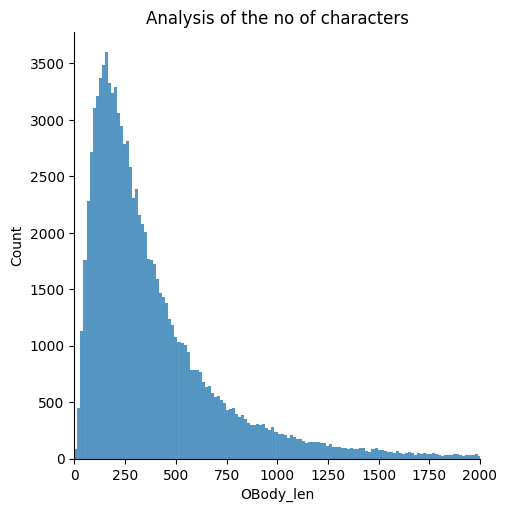

In [ ]:
plot_no_of_characters(stack_data,'OBody_len')

It is seen from the above graph and stats that most of the questions contains around 250 characters of questions. For our analyis we will consider first 300 characters from the questions
     

In [ ]:
FIXED_LEN_FOR_BODY = 300

def append_data(row, title, tags, body, body_len):
    final_len = min(int(body_len), FIXED_LEN_FOR_BODY)
    data = f"{title} {tags} {body[:final_len]}"
    return data

def append_original_data(row):
    return append_data(row, row['OTitle'], row['OTags'], row['OBody'], row['OBody_len'])

def append_duplicate_data(row):
    return append_data(row, row['DTitle'], row['DTags'], row['DBody'], row['DBody_len'])

In [ ]:
# Merging the OTitle, OBody and OTags into a single column inorder to grab all the features

stack_data['question1'] = stack_data.apply(lambda x: append_original_data(x),axis=1)
stack_data['question2'] = stack_data.apply(lambda x: append_duplicate_data(x),axis=1)

In [ ]:
stack_data['q1len'] = stack_data['question1'].str.len()
stack_data['q2len'] = stack_data['question2'].str.len()

get_characters_agg(stack_data,'q1len')

Minimum characters present in Question -  32
Maximum characters present in Question -  512
Average num of characters in Question -  306.53068


create two new dataframes that only contains the columns 'question1', 'question2', and 'isDuplicate', for both the stack over flow and quora dataset.

In [ ]:
stack_data = stack_data[['question1', 'question2', 'isDuplicate']]

In [ ]:
quora_data = train_df_balanced[['question1','question2','is_duplicate']]

In [ ]:
# renaming the column in the stack_data dataframe to match the name in the quora_data dataframe.

stack_data = stack_data.rename(columns={'isDuplicate': 'is_duplicate'})

In [ ]:
train_df_balanced = pd.concat([stack_data[['question1', 'question2', 'is_duplicate']], quora_data[['question1','question2','is_duplicate']]], ignore_index=True)


# 6.&nbsp; Feature Engineering

### 5.1.&nbsp; Feature Engineering

<p align='justify'>
Feature engineering is the process of using domain knowledge to extract features from raw data that can be used to improve the performance of machine learning and deep learning models. In the case of detecting duplicate questions in the Quora and stack overflow datasets, feature engineering could involve creating new features or modifying existing features in a way that makes it easier to identify duplicate questions. This might involve creating new features based on the content or context of the questions, or by using techniques like natural language processing (NLP) to extract relevant features from the text of the questions.

#### 5.2.1.&nbsp; Token based Feature Engineering
Token based Features include simple characteristics of the questions, such as their length or the presence of certain words or phrases.

1.	**q1len** – Specifies the number of characters present in the question 1.
2.	**q2len** – Specifies the number of characters present in the question 2.
3.	**q1_no_words** - Specifies the number of words present in the question 1.
4.	**q2_no_words** - Specifies the number of words present in the question 2.
5.	**common_words** – Specifies the number of words that are common between question 1 and question 2.
6.	**total_words** – Specifies the total number of words present in both questions.
7.	**shared_words** – Specifies the total number of words shared between the two questions, calculated as the total number of common words divided by the total number of words.

In [ ]:
def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features = [
        common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV),
        common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV),
        common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV),
        common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV),
        common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV),
        common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV),
        int(q1_tokens[-1] == q2_tokens[-1]), # Last word of both question is same or not
        int(q1_tokens[0] == q2_tokens[0]) # First word of both question is same or not
    ]
    
    return token_features
     

In [ ]:
token_feature_engineering = train_df_balanced.apply(fetch_token_features, axis=1)


train_df_balanced["common_words_min"] = list(map(lambda x: x[0], token_feature_engineering))
train_df_balanced["common_words_max"] = list(map(lambda x: x[1], token_feature_engineering))
train_df_balanced["common_stop_min"] = list(map(lambda x: x[2], token_feature_engineering))
train_df_balanced["common_stop_max"]  = list(map(lambda x: x[3], token_feature_engineering))
train_df_balanced["common_token_min"]  = list(map(lambda x: x[4], token_feature_engineering))
train_df_balanced["common_token_max"]  = list(map(lambda x: x[5], token_feature_engineering))
train_df_balanced["last_word_equal"] = list(map(lambda x: x[6], token_feature_engineering))
train_df_balanced["first_word_equal"] = list(map(lambda x: x[7], token_feature_engineering))

In [ ]:
train_df_balanced.head()

,question1,question2,is_duplicate,common_words_min,common_words_max,common_stop_min,common_stop_max,common_token_min,common_token_max,last_word_equal,first_word_equal
0,Self-references in object literals / initializ...,reference variable in object literal? javascri...,1,0.428569,0.321427,0.99990,0.999900,0.303029,0.263157,0.0,0.0
1,Ubuntu and Ruby version ruby ubuntu version bu...,Installing RVM (Ruby Version Manager) ruby som...,1,0.181817,0.044444,0.00000,0.000000,0.111110,0.038461,0.0,0.0
2,Printing from a Windows Service c# printing wi...,Printing from a .NET Service c# .net windows-s...,1,0.349998,0.155555,0.99995,0.999950,0.409089,0.176470,0.0,1.0
3,Can a file be opened simultaneously under SIlv...,issue reading in data c++ fstream trouble read...,0,0.076923,0.054054,0.00000,0.000000,0.052631,0.038461,0.0,0.0
4,Nested foreach in PHP produces different resul...,Renaming project directory in VS 2010 visual-s...,0,0.047619,0.031250,0.99990,0.499975,0.068965,0.038461,0.0,0.0


#### 5.2.2.&nbsp; Distance based Feature Engineering
The distance-based features measures, helped to identify the similarity or dissimilarity of the questions.

1.	**mean_length** – The average length (in number of words) of the two questions.
2.	**abs_length** – The absolute difference in length (in number of words) between the two questions.
3.	**longest_substring_ratio** – The proportion of the length of the longest shared substring among the two questions to the length of the smaller question.

In [5]:
# Check point 6 

# train_df_balanced.to_pickle("/content/drive/MyDrive/unzipped/checkpoint6.pkl")

train_df_balanced = pd.read_pickle('/content/drive/MyDrive/unzipped/checkpoint6.pkl')

In [6]:
def get_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    feature_length = [0.0]*3
    
    # Converting the Sentence into Tokens:
    q1_tokens = word_tokenize(q1)
    q2_tokens = word_tokenize(q2)
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return feature_length
    
    # Absolute length features
    feature_length[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    feature_length[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    if len(strs) == 0:
      feature_length[2] = 0.0
    else:
      feature_length[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return feature_length
     

In [ ]:
length_features = train_df_balanced.apply(get_length_features, axis=1)

train_df_balanced['abs_length'] = list(map(lambda x: x[0], length_features))
train_df_balanced['mean_length'] = list(map(lambda x: x[1], length_features))
train_df_balanced['longest_substring_ratio'] = list(map(lambda x: x[2], length_features))

#### 5.2.3.&nbsp; Fuzzywuzzy based Feature Engineering
<p align='justify'>
The code uses the FuzzyWuzzy package to generate fuzzy matching features between two strings. The package provides several functions to compute different fuzzy matching metrics such as fuzz_ratio, fuzz_partial_ratio, token_sort_ratio, and token_set_ratio.

fuzz_ratio measures the similarity of two strings based on the number of common characters divided by the length of the longer string. fuzz_partial_ratio measures the similarity based on the longest contiguous common substring. token_sort_ratio measures the similarity of two strings based on the order of the words, while token_set_ratio measures the similarity based on the set of words present in the strings regardless of the order.

In [ ]:
def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
fuzzy_features = train_df_balanced.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
train_df_balanced['fuzzy_ratio'] = list(map(lambda x: x[0], fuzzy_features))
train_df_balanced['fuzzy_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
train_df_balanced['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
train_df_balanced['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
train_df_balanced.head()

### 5.2.&nbsp; Visualizing new features

#### 5.3.1.&nbsp; Heat Map

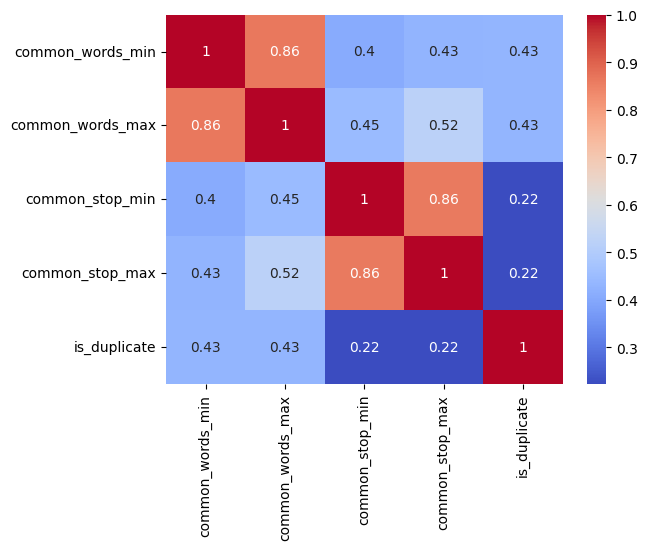

In [ ]:
# Create a correlation matrix to show the correlation between features and target variable
corr_matrix = train_df_balanced[['common_words_min', 'common_words_max','common_stop_min', 'common_stop_max', 'is_duplicate']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

#### 5.3.1.&nbsp; Pair Plot 1

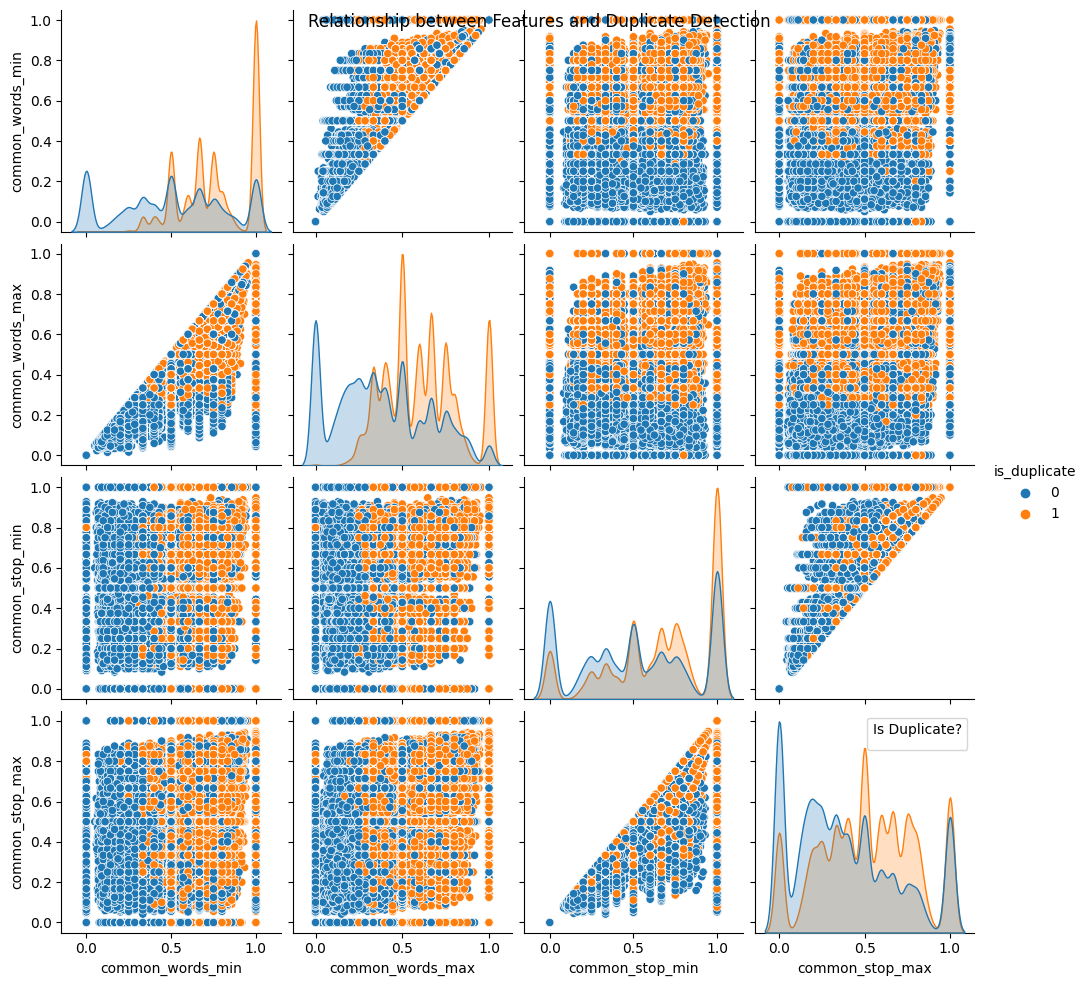

In [ ]:
# Create a pairplot to visualize the relationship between the features and target variable
sns.pairplot(train_df_balanced[['common_words_min', 'common_words_max','common_stop_min', 'common_stop_max', 'is_duplicate']],
             hue='is_duplicate')

# Set descriptive labels for axes and legend
plt.xlabel('Common Words Min')
plt.ylabel('Common Words Max')
plt.legend(title='Is Duplicate?')

# Add a title to the plot
plt.suptitle('Relationship between Features and Duplicate Detection')

plt.show()

In [ ]:
# Check Point 1

# train_df_balanced.to_pickle("/content/drive/MyDrive/unzipped/template.pkl")

train_df_balanced = pd.read_pickle('/content/drive/MyDrive/unzipped/template.pkl')

#### 5.3.1.&nbsp; Pair Plot 2

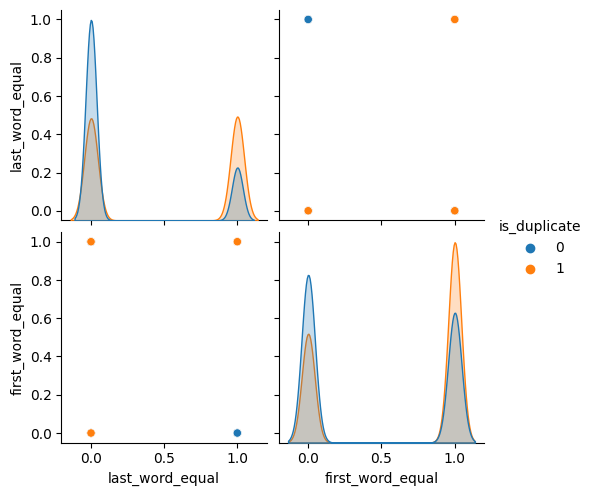

In [ ]:
sns.pairplot(train_df_balanced[['last_word_equal', 'first_word_equal', 'is_duplicate']],hue='is_duplicate')
plt.show()

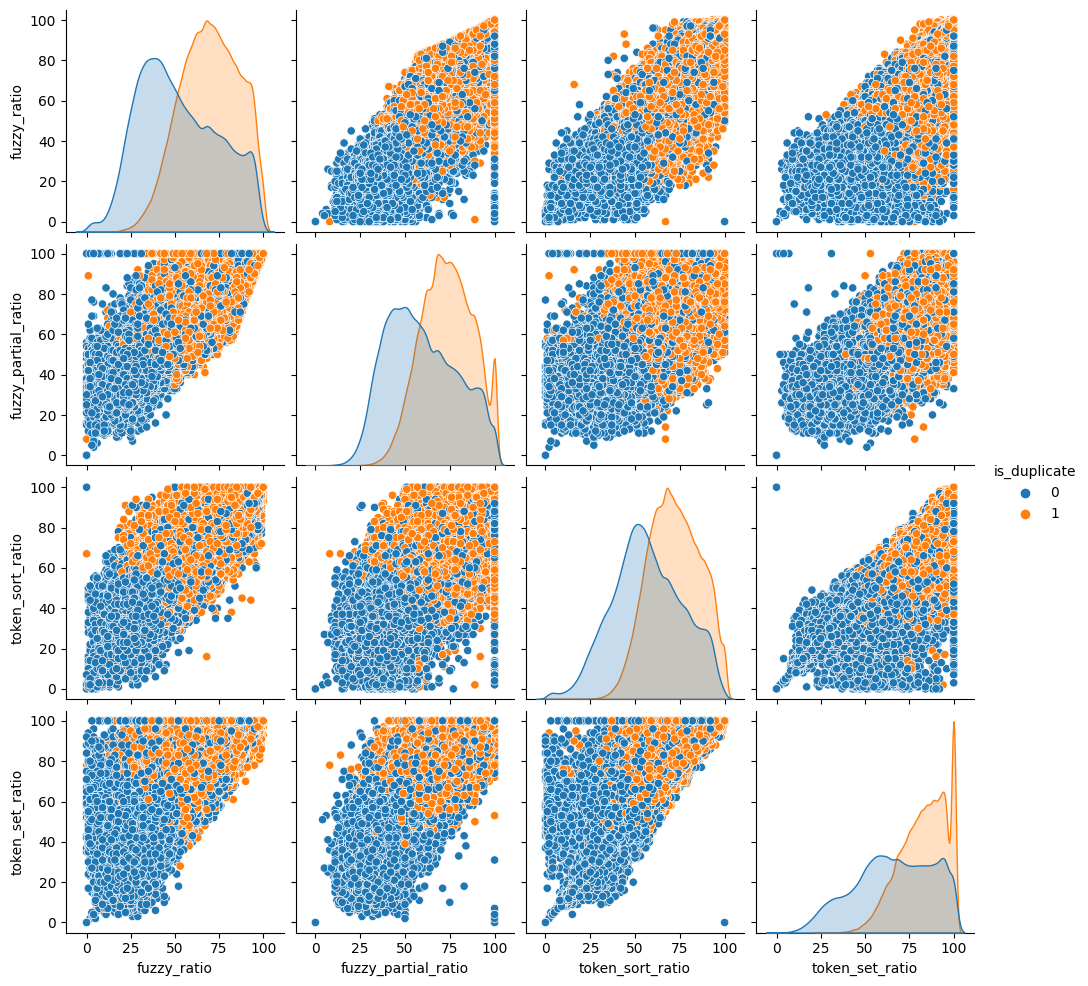

In [ ]:
sns.pairplot(train_df_balanced[['fuzzy_ratio','fuzzy_partial_ratio', 'token_sort_ratio', 'token_set_ratio', 'is_duplicate']],hue='is_duplicate')
plt.show()

### 5.3.&nbsp; Count Vectorizer 
<p align='justify'>
The CountVectorizer is used to convert text data into numerical vectors that can be used as features in machine learning models. It works by creating a vocabulary of all unique words in the text corpus and then counting the occurrences of each word in each text document. The resulting count matrix can then be used as input to a machine learning model. The max_features parameter is used to limit the number of unique words that are included in the vocabulary, reducing the dimensionality of the resulting feature vectors. The resulting sparse matrices are then horizontally stacked and combined into a single dataframe. This dataframe is used as the input data for training and testing machine learning models.

#### 5.4.1.&nbsp; Total no of features present

In [ ]:
# Combine all the questions into a single list
all_questions = list(train_df_balanced['question1']) + list(train_df_balanced['question2'])

# Initialize a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the CountVectorizer object to the list of questions
X = vectorizer.fit_transform(all_questions)

In [ ]:
# Get the feature names and count the total number of features
features = vectorizer.vocabulary_
total_features = len(features)

print("Total number of features:", total_features)

Total number of features: 68695


The total number of features present from the complete corpus of the questions is 68695, but out of this we will first utilize the 3000 features and check for the accuracy fo the questions.

#### 5.4.2.&nbsp; Conversion of Spare Matrix to Dataframe

<p align='justify'>
In the below code, we are using the CountVectorizer from Scikit-Learn to convert the text data (questions) into numerical features. We first combine all the questions into a single list and then initialize a CountVectorizer object with a maximum of 3000 features. We then fit the CountVectorizer object to the list of questions and transform individual questions into sparse matrices. After that, we combine the sparse matrices horizontally using the hstack function from the Scipy library. Finally, we convert the combined sparse matrix to a Pandas dataframe. This process of converting text data into numerical features is a crucial step in any Natural Language Processing task.

In [ ]:
from scipy.sparse import csr_matrix,hstack

# Combine all the questions into a single list
all_questions = list(train_df_balanced['question1']) + list(train_df_balanced['question2'])

# Initialize a CountVectorizer object
vectorizer = CountVectorizer(max_features=3000)

# Fit the CountVectorizer object to the list of questions
vectorizer.fit(all_questions)

# Transform individual questions into sparse matrices
q1_sparse = csr_matrix(vectorizer.transform(list(train_df_balanced['question1'])), dtype=np.int8)
q2_sparse = csr_matrix(vectorizer.transform(list(train_df_balanced['question2'])), dtype=np.int8)

# Combine the sparse matrices horizontally
combined_sparse = hstack([q1_sparse, q2_sparse])

# Convert the combined sparse matrix to a dataframe
combined_df = pd.DataFrame.sparse.from_spmatrix(combined_sparse)

In [ ]:
# Free up memory used by q1_vector and q2_vector
del q1_sparse, q2_sparse

In [ ]:
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
print(combined_df.iloc[0].tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

The length of the column names list obtained from the vectorizer is 3000, but the length of the columns in the combined_df dataframe is 6000 (due to the horizontal stacking of the sparse matrices). To set the column names of the combined_df dataframe, you need to create a new list with 6000 elements that contains the column names.

In [ ]:
feature_names = list(vectorizer.vocabulary_.keys())
col_names = feature_names + feature_names

In [ ]:
combined_df.set_axis(col_names, axis=1, inplace=True)

In [ ]:
combined_df.head()

,what,is,the,difference,between,your,review,of,how,can,...,gen,dreaming,dslr,dry,moto,marvel,saudi,younger,backup,declare
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### 5.4.3.&nbsp; Overall Integration

In [ ]:
train_df_balanced.reset_index(drop=True, inplace=True)
combined_df.reset_index(drop=True, inplace=True)

In [ ]:
# Drop 'question1' and 'question2' columns from train_df_balanced
train_df_new = train_df_balanced.drop(['question1', 'question2','id','qid1','qid2'], axis=1)

# Concatenate train_df_new and combined_df dataframes
new_df = pd.concat([train_df_new, combined_df], axis=1)

In [ ]:
new_df.head()

,is_duplicate,common_words_min,common_words_max,common_stop_min,common_stop_max,common_token_min,common_token_max,last_word_equal,first_word_equal,abs_length,...,gen,dreaming,dslr,dry,moto,marvel,saudi,younger,backup,declare
0,1,0.499988,0.499988,0.999975,0.799984,0.749991,0.666659,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.249994,0.099999,0.249994,0.124998,0.249997,0.100000,0.0,0.0,12.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.599988,0.599988,0.000000,0.000000,0.499992,0.374995,1.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.999975,0.666656,0.999950,0.285710,0.999983,0.428568,0.0,0.0,8.0,...,0,1,0,0,0,0,0,0,0,0
4,1,0.749981,0.599988,0.499988,0.399992,0.555549,0.555549,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Check Point 2

# new_df.to_pickle("/content/drive/MyDrive/unzipped/template_1.pkl")

new_df = pd.read_pickle('/content/drive/MyDrive/unzipped/template_1.pkl')

### 5.4.&nbsp; Train Test Splitting
<p align='justify'>

Train-test splitting is a common technique used in machine learning to evaluate the performance of a model on unseen data. In my code, I have used the train_test_split function from the sklearn library to split the dataset into training and testing sets. This function randomly shuffles the data and splits it into two parts, one for training and one for testing. The training set is used to train the model, and the testing set is used to evaluate the performance of the model.

I have used an 80/20 split, which means that 80% of the data is used for training and 20% for testing. The random_state parameter is set to 101 to ensure reproducibility, so that if the code is run again with the same parameters, the same split will be obtained.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(new_df.iloc[:,1:],new_df.iloc[:,0],test_size=0.2,random_state=101)

In [ ]:
# Check Point 3

# Save train and test sets
# X_train.to_pickle('/content/drive/MyDrive/unzipped/X_train.pkl')
# X_test.to_pickle('/content/drive/MyDrive/unzipped/X_test.pkl')
# y_train.to_pickle('/content/drive/MyDrive/unzipped/y_train.pkl')
# y_test.to_pickle('/content/drive/MyDrive/unzipped/y_test.pkl')


# Load train and test sets
X_train = pd.read_pickle('/content/drive/MyDrive/unzipped/X_train.pkl')
X_test = pd.read_pickle('/content/drive/MyDrive/unzipped/X_test.pkl')
y_train = pd.read_pickle('/content/drive/MyDrive/unzipped/y_train.pkl')
y_test = pd.read_pickle('/content/drive/MyDrive/unzipped/y_test.pkl')


In [ ]:
print(X_train.columns.is_unique)

False


In [ ]:
print(len(X_train.columns[X_train.columns.duplicated()]))

3000


### 5.5.&nbsp; Converting to Vaex Dataset
<p align='justify'>

In [ ]:
# Convert to Dask DataFrames
dask_X_train = dd.from_pandas(X_train, npartitions=4)
dask_X_test = dd.from_pandas(X_test, npartitions=4)
dask_y_train = dd.from_pandas(y_train, npartitions=4)
dask_y_test = dd.from_pandas(y_test, npartitions=4)

In [ ]:
# Convert to vaex dataframe
vaex_X_train = vaex.from_pandas(X_train)
# vaex_X_test = vaex.from_pandas(X_test)
vaex_y_train = vaex.from_pandas(X_train)
# vaex_y_test = vaex.from_pandas(y_test)

# 6.&nbsp; Model Creation

## 6.1.&nbsp; SGD Classifier using Log

In [ ]:
from sklearn.linear_model import SGDClassifier


# Initialize the SGDClassifier
clf = SGDClassifier(loss='log', penalty='l2', random_state=101)

# Divide the dataset into small batches
batch_size = 1000
for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]
    # Train the model on the current batch
    clf.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


In [ ]:
# Make predictions on the test data
y_pred_lr = clf.predict(X_test)

Accuracy: 0.7318359963822731
Precision: 0.6686925657606846
Recall: 0.920271671852521
F1 score: 0.774565985666615


In [ ]:
def evaluate_all(y_test, y_pred):

  # Evaluate the model performance on the test data
  accuracy_lr = accuracy_score(y_test, y_pred)
  precision_lr = precision_score(y_test, y_pred)
  recall_lr = recall_score(y_test, y_pred)
  f1_lr = f1_score(y_test, y_pred)

  print(f"Accuracy: {accuracy_lr}")
  print(f"Precision: {precision_lr}")
  print(f"Recall: {recall_lr}")
  print(f"F1 score: {f1_lr}")

In [ ]:
evaluate_all(y_test, y_pred_lr)

Accuracy: 0.7318359963822731
Precision: 0.6686925657606846
Recall: 0.920271671852521
F1 score: 0.774565985666615


## 6.2.&nbsp; Random Forest Classifier

In [ ]:
# Define a generator function that yields batches of data
def batch_generator(X, y, batch_size):
    num_batches = len(X) // batch_size
    print(f'Total no of batches : {num_batches}')
    for i in range(num_batches):
        print(f"Batch number : {i}")
        start = i * batch_size
        end = start + batch_size
        yield X.iloc[start:end], y.iloc[start:end]


### 6.2.1. &nbsp; Without Batch Processing

In [ ]:
# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=101)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8234515794057549


In [ ]:
helper_functions.evaluate_all(y_test,y_pred)

Accuracy: 0.8234515794057549
Precision: 0.7883113786731836
Recall: 0.8849744052996086
F1 score: 0.8338508582507133


### 6.2.3. &nbsp; Using Batch Processing

In [ ]:
# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=101)

# Train the classifier on batches of data
batch_size = 150000
for X_batch, y_batch in batch_generator(X_train, y_train, batch_size):
  rf_classifier.fit(X_batch, y_batch)

# Evaluate the classifier on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Total no of batches : 1
Batch number : 0


In [ ]:
n_samples = sum(tree.tree_.n_node_samples.sum() for tree in rf_classifier.estimators_)
print('Number of samples used for training:', n_samples)

Number of samples used for training: 30561543


In [ ]:
len(X_train)

238820

In [ ]:
n_samples = sum(tree.tree_.n_node_samples.sum() for tree in rf_temp.estimators_)
print('Number of samples used for training:', n_samples)

Number of samples used for training: 3700572


## 6.3.&nbsp; XGBoost

In [ ]:
# Renaming all columns 

X_train.columns = [i for i in range(X_train.shape[1])]
X_test.columns = [i for i in range(X_test.shape[1])]

In [ ]:
import xgboost as xgb

# Create the XGBoost classifier
clf = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=101,verbose=True)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
helper_functions.evaluate_all(y_test,y_pred)

[20:08:43] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

Accuracy: 0.7628379057381167
Precision: 0.7089899285163828
Recall: 0.8926360868546958
F1 score: 0.7902843601895734


## 6.4.&nbsp; SVM Classifier

In [ ]:
from sklearn.svm import SVC

# Create the SVM classifier
clf = SVC(kernel='linear', C=1, random_state=101)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
helper_functions.evaluate_all(y_test, y_pred)

# 7.&nbsp; Performing Hyperparameter Tuning


## 7.1. &nbsp; Tuning RF - 1

In [ ]:
warnings.filterwarnings('ignore')

# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(random_state=101)

# Sample a subset of the training data for hyperparameter tuning
sample_size = 5000
X_train_sample = X_train.sample(n=sample_size, random_state=101)
y_train_sample = y_train.sample(n=sample_size, random_state=101)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy'
)

# Train the classifier on batches of data using GridSearchCV
batch_size = 1000
for X_batch, y_batch in batch_generator(X_train_sample, y_train_sample, batch_size):
    grid_search.fit(X_batch, y_batch)

# Print the best hyperparameters found by GridSearchCV
print('Best hyperparameters:', grid_search.best_params_)

Total no of batches : 5
Batch number : 0
Batch number : 1
Batch number : 2
Batch number : 3
Batch number : 4
Best hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


## 7.2. &nbsp; Tuning RF - 2

In [ ]:
warnings.filterwarnings('ignore')

# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(random_state=101)

# Sample a subset of the training data for hyperparameter tuning
sample_size = 5000
X_train_sample = X_train.sample(n=sample_size, random_state=101)
y_train_sample = y_train.sample(n=sample_size, random_state=101)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [300,500,700],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy'
)

# Train the classifier on batches of data using GridSearchCV
batch_size = 1000
for X_batch, y_batch in batch_generator(X_train_sample, y_train_sample, batch_size):
    grid_search.fit(X_batch, y_batch)

# Print the best hyperparameters found by GridSearchCV
print('Best hyperparameters:', grid_search.best_params_)

Total no of batches : 5
Batch number : 0
Batch number : 1
Batch number : 2
Batch number : 3
Batch number : 4
Best hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
warnings.filterwarnings('ignore')

# Create the random forest classifier
clf = RandomForestClassifier(max_depth= None, min_samples_split= 10, n_estimators= 300, verbose=2)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s


building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 38.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Accuracy: 0.8200180886343081


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   16.8s finished


In [ ]:
helper_functions.evaluate_all(y_test,y_pred)

Accuracy: 0.8200180886343081
Precision: 0.7799584661733306
Recall: 0.8921676871089699
F1 score: 0.8322981366459626
